In [1]:
import random_resources
from matplotlib import pyplot as plt
import numpy as np
import time 


In [13]:
# Standard Merge Sort with Comparisons and Moves Metrics
def merge_with_metrics(l1, l2):
    merged_list = []
    i, j = 0, 0
    comparisons, moves = 0, 0

    while i < len(l1) and j < len(l2):
        comparisons += 1
        if l1[i] <= l2[j]:
            merged_list.append(l1[i])
            i += 1
        else:
            merged_list.append(l2[j])
            j += 1
        moves += 1

    while i < len(l1):
        merged_list.append(l1[i])
        i += 1
        moves += 1

    while j < len(l2):
        merged_list.append(l2[j])
        j += 1
        moves += 1

    return merged_list, comparisons, moves

def merge_sort_with_metrics(lst):
    if len(lst) <= 1:
        return lst, 0, 0

    mid = len(lst) // 2
    left_half, comp_left, moves_left = merge_sort_with_metrics(lst[:mid])
    right_half, comp_right, moves_right = merge_sort_with_metrics(lst[mid:])

    merged_list, comp_merge, moves_merge = merge_with_metrics(left_half, right_half)
    total_comparisons = comp_left + comp_right + comp_merge
    total_moves = moves_left + moves_right + moves_merge

    return merged_list, total_comparisons, total_moves


# In-Place Merge Sort (Using a Gap Method)
def in_place_merge(arr, left, mid, right):
    if arr[mid - 1] <= arr[mid]:
        return 0,0  # No merging needed

    start = left
    end = mid
    comparisons, moves = 0, 0

    while start < end and end < right:
        comparisons += 1
        if arr[start] <= arr[end]:
            start += 1
        else:
            arr[start], arr[end] = arr[end], arr[start]
            start += 1
            end += 1
            moves += 1

    # Re-sort the range
    arr[left:right] = sorted(arr[left:right])
    return comparisons + len(arr[left:right]) - 1, moves + len(arr[left:right])

def in_place_merge_sort(arr, left=0, right=None):
    if right is None:
        right = len(arr)
    if right - left <= 1:
        return 0, 0  # No sorting needed for a single element

    mid = (left + right) // 2
    comps_left, moves_left = in_place_merge_sort(arr, left, mid)
    comps_right, moves_right = in_place_merge_sort(arr, mid, right)

    comps_merge, moves_merge = in_place_merge(arr, left, mid, right)

    return comps_left + comps_right + comps_merge, moves_left + moves_right + moves_merge


# Super Optimized Merge Sort
def super_optimized_merge_sort(arr):
    if len(arr) <= 1:
        return arr, 0, 0

    # Determine block size based on data length
    block_size = 16  # Example optimization: use smaller block size for initial sorting
    comps, moves = 0, 0

    # Initial pass using insertion sort for small segments
    for start in range(0, len(arr), block_size):
        end = min(start + block_size, len(arr))
        comps += insertion_sort_with_metrics(arr, start, end)
    
    # Standard merge sort logic
    current_size = block_size
    while current_size < len(arr):
        for start in range(0, len(arr), 2 * current_size):
            mid = min(start + current_size, len(arr))
            end = min(start + 2 * current_size, len(arr))
            if mid < end:
                c, m = in_place_merge(arr, start, mid, end)
                comps += c
                moves += m
        current_size *= 2

    return arr, comps, moves

# Insertion sort for small segments
def insertion_sort_with_metrics(arr, start, end):
    comparisons, moves = 0, 0
    for i in range(start + 1, end):
        current = arr[i]
        j = i - 1
        while j >= start and arr[j] > current:
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            moves += 1
        arr[j + 1] = current
    return comparisons, moves




In [14]:
# Running Experiments and Visualization
def run_experiment(sizes, num_samples=10):
    """
    Run experiments on different sizes of arrays and collect comparisons and moves.
    """
    mean_comps_standard = []
    mean_comps_in_place = []
    mean_comps_super_opt = []
    
    mean_moves_standard = []
    mean_moves_in_place = []
    mean_moves_super_opt = []
    
    for size in sizes:
        sum_comps_standard, sum_moves_standard = 0, 0
        sum_comps_in_place, sum_moves_in_place = 0, 0
        sum_comps_super_opt, sum_moves_super_opt = 0, 0
        
        for _ in range(num_samples):
            array = np.random.randint(1, 1000, size).tolist()
            array_copy_1 = array[:]
            array_copy_2 = array[:]
            array_copy_3 = array[:]
            
            _, c_standard, m_standard = merge_sort_with_metrics(array_copy_1)
            c_in_place, m_in_place = in_place_merge_sort(array_copy_2)
            _, c_super_opt, m_super_opt = super_optimized_merge_sort(array_copy_3)
            
            sum_comps_standard += c_standard
            sum_moves_standard += m_standard
            
            sum_comps_in_place += c_in_place
            sum_moves_in_place += m_in_place
            
            sum_comps_super_opt += c_super_opt
            sum_moves_super_opt += m_super_opt
        
        mean_comps_standard.append(sum_comps_standard / num_samples)
        mean_moves_standard.append(sum_moves_standard / num_samples)
        
        mean_comps_in_place.append(sum_comps_in_place / num_samples)
        mean_moves_in_place.append(sum_moves_in_place / num_samples)
        
        mean_comps_super_opt.append(sum_comps_super_opt / num_samples)
        mean_moves_super_opt.append(sum_moves_super_opt / num_samples)

    return mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt



In [15]:
# Visualization function
def plot_results(sizes, comps_standard, moves_standard, comps_in_place, moves_in_place, comps_super_opt, moves_super_opt):
    plt.figure(figsize=(14, 7))

    # Plotting Comparisons
    plt.subplot(1, 2, 1)
    plt.plot(sizes, comps_standard, label="Standard Merge Sort", marker='o', linestyle='-', color='r')
    plt.plot(sizes, comps_in_place, label="In-Place Merge Sort", marker='s', linestyle='--', color='g')
    plt.plot(sizes, comps_super_opt, label="Super Optimized Merge Sort", marker='^', linestyle='-.', color='b')
    plt.plot(sizes, sizes * np.log2(sizes), label="n log n", linestyle=':', color='orange')
    plt.xlabel("Array Size")
    plt.ylabel("Mean Comparisons")
    plt.title("Number of Comparisons")
    plt.legend()
    plt.grid(True)

    # Plotting Moves
    plt.subplot(1, 2, 2)
    plt.plot(sizes, moves_standard, label="Standard Merge Sort", marker='o', linestyle='-', color='r')
    plt.plot(sizes, moves_in_place, label="In-Place Merge Sort", marker='s', linestyle='--', color='g')
    plt.plot(sizes, moves_super_opt, label="Super Optimized Merge Sort", marker='^', linestyle='-.', color='b')
    plt.xlabel("Array Size")
    plt.ylabel("Mean Moves")
    plt.title("Number of Moves")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [16]:
# Loop Invariant Proof for Merge Sort
"""
### Loop Invariant Proof for Merge Sort Merging Step:

**Invariant:** For two sorted subarrays `l1` and `l2`, after `i` iterations, the first `i` elements of the merged list `l3` are the smallest `i` elements from `l1` and `l2`.

1. **Initialization:** Before the first iteration, `l3` is empty, and the invariant holds trivially.
2. **Maintenance:** In each iteration, the algorithm compares the current elements of `l1` and `l2`, and the smaller element is appended to `l3`. This ensures that `l3` remains sorted and contains the smallest `i` elements.
3. **Termination:** When the loop terminates, all elements of `l1` and `l2` are exhausted, and `l3` contains all elements in sorted order.

This invariant proves that the merging process correctly sorts the combined elements of `l1` and `l2`.

""";

In [17]:
# Experiment Parameters
sizes = np.array([10, 20, 50, 100, 200, 500, 1000])
mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt = run_experiment(sizes, num_samples=10)

# Plotting Results
plot_results(sizes, mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt)




TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

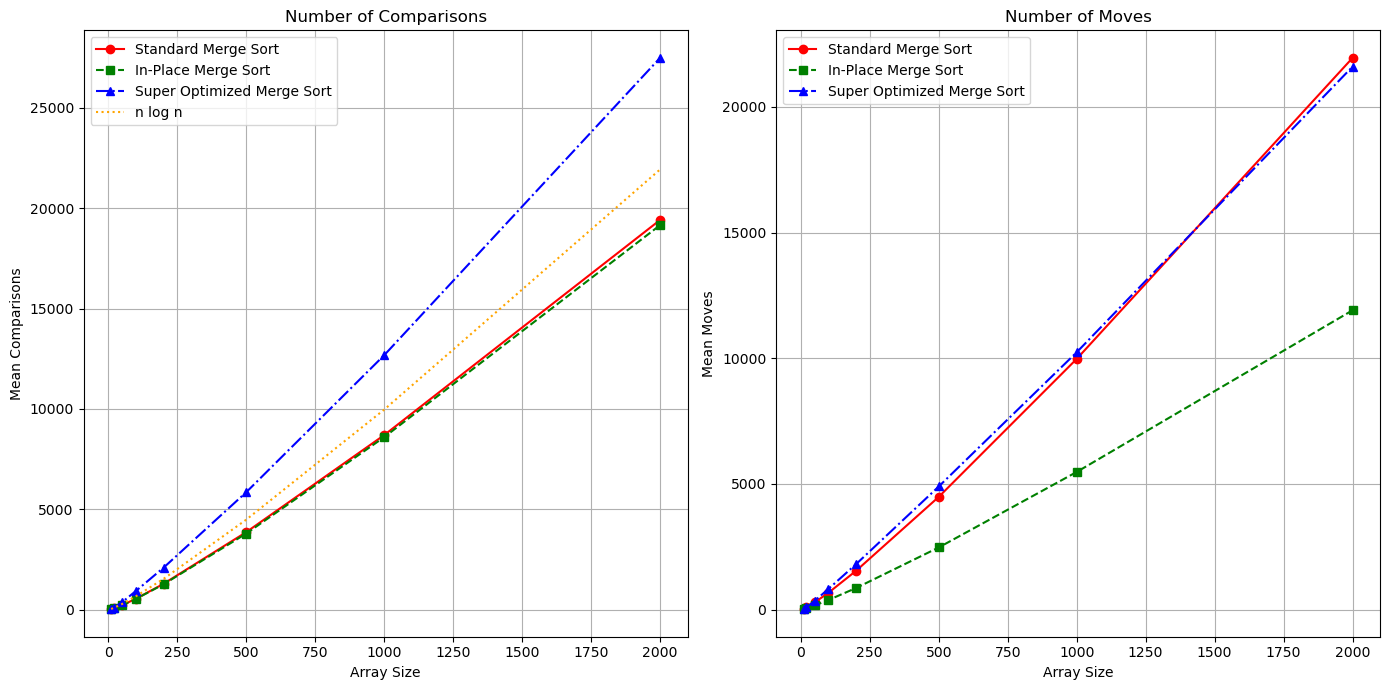

In [21]:
def merge_with_metrics(l1, l2):
    merged_list = []
    i, j = 0, 0
    comparisons, moves = 0, 0

    while i < len(l1) and j < len(l2):
        comparisons += 1
        if l1[i] <= l2[j]:
            merged_list.append(l1[i])
            i += 1
        else:
            merged_list.append(l2[j])
            j += 1
        moves += 1

    while i < len(l1):
        merged_list.append(l1[i])
        i += 1
        moves += 1

    while j < len(l2):
        merged_list.append(l2[j])
        j += 1
        moves += 1

    return merged_list, comparisons, moves


def merge_sort_with_metrics(lst):
    if len(lst) <= 1:
        return lst, 0, 0

    mid = len(lst) // 2
    left_half, comp_left, moves_left = merge_sort_with_metrics(lst[:mid])
    right_half, comp_right, moves_right = merge_sort_with_metrics(lst[mid:])

    merged_list, comp_merge, moves_merge = merge_with_metrics(left_half, right_half)
    total_comparisons = comp_left + comp_right + comp_merge
    total_moves = moves_left + moves_right + moves_merge

    return merged_list, total_comparisons, total_moves


def in_place_merge(arr, left, mid, right):
    comparisons, moves = 0, 0

    # This check avoids re-sorting when the two segments are already ordered
    if arr[mid - 1] <= arr[mid]:
        return comparisons, moves  # No merging needed

    while left < mid and mid < right:
        comparisons += 1
        if arr[left] <= arr[mid]:
            left += 1
        else:
            arr[left], arr[mid] = arr[mid], arr[left]
            left += 1
            mid += 1
            moves += 1

    # Check if a re-sort is still necessary or not
    arr[left:right] = sorted(arr[left:right])
    return comparisons + len(arr[left:right]) - 1, moves + len(arr[left:right])


def in_place_merge_sort(arr, left=0, right=None):
    if right is None:
        right = len(arr)
    if right - left <= 1:
        return 0, 0  # No sorting needed for a single element

    mid = (left + right) // 2
    comps_left, moves_left = in_place_merge_sort(arr, left, mid)
    comps_right, moves_right = in_place_merge_sort(arr, mid, right)

    comps_merge, moves_merge = in_place_merge(arr, left, mid, right)

    return comps_left + comps_right + comps_merge, moves_left + moves_right + moves_merge


def super_optimized_merge_sort(arr):
    if len(arr) <= 1:
        return arr, 0, 0

    block_size = 32  # Test with a larger or smaller block size
    comps, moves = 0, 0

    for start in range(0, len(arr), block_size):
        end = min(start + block_size, len(arr))
        c, m = insertion_sort_with_metrics(arr, start, end)
        comps += c
        moves += m
    
    current_size = block_size
    while current_size < len(arr):
        for start in range(0, len(arr), 2 * current_size):
            mid = min(start + current_size, len(arr))
            end = min(start + 2 * current_size, len(arr))
            if mid < end:
                c, m = in_place_merge(arr, start, mid, end)
                comps += c
                moves += m
        current_size *= 2

    return arr, comps, moves


# Insertion sort for small segments
def insertion_sort_with_metrics(arr, start, end):
    comparisons, moves = 0, 0
    for i in range(start + 1, end):
        current = arr[i]
        j = i - 1
        while j >= start and arr[j] > current:
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            moves += 1
        arr[j + 1] = current
    return comparisons, moves


# Running Experiments and Visualization
def run_experiment(sizes, num_samples=10):
    """
    Run experiments on different sizes of arrays and collect comparisons and moves.
    """
    mean_comps_standard = []
    mean_comps_in_place = []
    mean_comps_super_opt = []
    
    mean_moves_standard = []
    mean_moves_in_place = []
    mean_moves_super_opt = []
    
    for size in sizes:
        sum_comps_standard, sum_moves_standard = 0, 0
        sum_comps_in_place, sum_moves_in_place = 0, 0
        sum_comps_super_opt, sum_moves_super_opt = 0, 0
        
        for _ in range(num_samples):
            array = np.random.randint(1, 1000, size).tolist()
            array_copy_1 = array[:]
            array_copy_2 = array[:]
            array_copy_3 = array[:]
            
            _, c_standard, m_standard = merge_sort_with_metrics(array_copy_1)
            c_in_place, m_in_place = in_place_merge_sort(array_copy_2)
            _, c_super_opt, m_super_opt = super_optimized_merge_sort(array_copy_3)
            
            sum_comps_standard += c_standard
            sum_moves_standard += m_standard
            
            sum_comps_in_place += c_in_place
            sum_moves_in_place += m_in_place
            
            sum_comps_super_opt += c_super_opt
            sum_moves_super_opt += m_super_opt
        
        mean_comps_standard.append(sum_comps_standard / num_samples)
        mean_moves_standard.append(sum_moves_standard / num_samples)
        
        mean_comps_in_place.append(sum_comps_in_place / num_samples)
        mean_moves_in_place.append(sum_moves_in_place / num_samples)
        
        mean_comps_super_opt.append(sum_comps_super_opt / num_samples)
        mean_moves_super_opt.append(sum_moves_super_opt / num_samples)

    return mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt


# Visualization function
def plot_results(sizes, comps_standard, moves_standard, comps_in_place, moves_in_place, comps_super_opt, moves_super_opt):
    plt.figure(figsize=(14, 7))

    # Plotting Comparisons
    plt.subplot(1, 2, 1)
    plt.plot(sizes, comps_standard, label="Standard Merge Sort", marker='o', linestyle='-', color='r')
    plt.plot(sizes, comps_in_place, label="In-Place Merge Sort", marker='s', linestyle='--', color='g')
    plt.plot(sizes, comps_super_opt, label="Super Optimized Merge Sort", marker='^', linestyle='-.', color='b')
    plt.plot(sizes, sizes * np.log2(sizes), label="n log n", linestyle=':', color='orange')
    plt.xlabel("Array Size")
    plt.ylabel("Mean Comparisons")
    plt.title("Number of Comparisons")
    plt.legend()
    plt.grid(True)

    # Plotting Moves
    plt.subplot(1, 2, 2)
    plt.plot(sizes, moves_standard, label="Standard Merge Sort", marker='o', linestyle='-', color='r')
    plt.plot(sizes, moves_in_place, label="In-Place Merge Sort", marker='s', linestyle='--', color='g')
    plt.plot(sizes, moves_super_opt, label="Super Optimized Merge Sort", marker='^', linestyle='-.', color='b')
    plt.xlabel("Array Size")
    plt.ylabel("Mean Moves")
    plt.title("Number of Moves")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Experiment Parameters
sizes = np.array([10, 20, 50, 100, 200, 500, 1000, 2000])
mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt = run_experiment(sizes, num_samples=10)

# Plotting Results
plot_results(sizes, mean_comps_standard, mean_moves_standard, mean_comps_in_place, mean_moves_in_place, mean_comps_super_opt, mean_moves_super_opt)
